<a href="https://colab.research.google.com/github/dead96pool/stress_detection_mlai/blob/main/MLAI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD, RMSprop

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV
# To gbm light
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, chi2



# Creating Dataset

In [2]:
# git repo clone
!git clone https://github.com/dead96pool/datasets
# removing the clone
#!rm -rf datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2817, done.
remote: Counting objects: 100% (1402/1402), done.
remote: Compressing objects: 100% (1388/1388), done.
remote: Total 2817 (delta 10), reused 1401 (delta 9), pack-reused 1415
Receiving objects: 100% (2817/2817), 65.32 MiB | 22.47 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Filtering content: 100% (1357/1357), 853.65 MiB | 11.63 MiB/s, done.


In [3]:
calm_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/"
stress_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/"

In [4]:
column_names = [
    'participant_id', 'age', 'gender', 'key_press_count', 'delete_key_press_count',
    'text_id', 'text_length', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'accelerometer_magnitude', 'gravity_x', 'gravity_y', 'gravity_z', 'gravity_magnitude',
    'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z',
    'linear_acceleration_magnitude',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'gyroscope_magnitude',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z', 'magnetometer_magnitude',
    'light_sensor', 'proximity_sensor',
    'game_rotation_vector_x', 'game_rotation_vector_y', 'game_rotation_vector_z',
    'game_rotation_vector_magnitude',
    'rotation_sensor_x', 'rotation_sensor_y', 'rotation_sensor_z', 'rotation_sensor_scalar',
    'rotation_sensor_value',
    'rotation_sensor_magnitude',
    'orientation_azimuth', 'orientation_pitch', 'orientation_roll', 'orientation_sensor_magnitude',
    'number_of_steps'
]

In [5]:
# looping throught the calm folder to combine all the CALM files
calm_pattern = calm_path + "CALM_*_2.csv"
calm_files = glob.glob(calm_pattern)

calm_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    calm_df.append(df)


In [6]:
# looping throught the calm folder to combine all the STRESS files
stress_pattern = stress_path + "STRESS_*_2.csv"
stress_files = glob.glob(stress_pattern)

stress_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    stress_df.append(df)


In [7]:

# combining all the calm files
calm_combine_df = pd.concat(calm_df, axis=0, ignore_index= True)

In [8]:

# combining all the stress files
stress_combine_df = pd.concat(stress_df, axis=0, ignore_index= True)

In [9]:
# 0 is calm
# 1 is stressed
calm_combine_df["stress"] = 0
stress_combine_df["stress"] = 1

In [10]:
# calm dataset
display(calm_combine_df.sort_values(by='participant_id'))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
60908,1,30,Male,5,0,2,47,-2.002466,5.532554,7.665502,...,-0.292692,0.902759,0.174533,1.015117,32.001526,-35.141285,-12.066292,49.036750,14.0,0
61203,1,30,Male,29,0,2,47,-1.640440,5.052590,7.627345,...,-0.286093,0.906877,0.174533,1.015117,31.342285,-34.285694,-11.877488,47.947080,14.0,0
61202,1,30,Male,29,0,2,47,-1.952729,5.387705,7.932359,...,-0.286093,0.906877,0.174533,1.015117,31.342285,-34.285694,-11.877488,47.947080,14.0,0
61201,1,30,Male,29,0,2,47,-1.773091,5.241420,8.073188,...,-0.294103,0.908272,0.174533,1.015117,32.664825,-33.094826,-10.807020,47.739400,14.0,0
61200,1,30,Male,29,0,2,47,-1.582435,4.845712,8.356974,...,-0.301505,0.909052,0.174533,1.015117,33.731567,-31.971308,-10.330194,47.609833,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,110,21,Male,17,1,2,47,0.653637,8.820508,4.728693,...,0.594338,0.620916,0.000000,0.999999,271.339360,-61.285854,3.429664,278.195560,0.0,0
7595,110,21,Male,17,1,2,47,0.653637,8.820508,4.728693,...,0.594338,0.620916,0.000000,0.999999,271.339360,-61.285854,3.429664,278.195560,0.0,0
7596,110,21,Male,17,1,2,47,0.653637,8.820508,4.728693,...,0.594338,0.620916,0.000000,0.999999,271.339360,-61.285854,3.429664,278.195560,0.0,0
7589,110,21,Male,16,0,2,47,0.785322,8.502069,5.185999,...,0.595245,0.620922,0.000000,0.999999,271.179080,-61.120350,3.651801,278.005600,0.0,0


In [11]:
# stress dataset
display(stress_combine_df.sort_values(by='participant_id'))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
60908,1,30,Male,5,0,2,47,-2.002466,5.532554,7.665502,...,-0.292692,0.902759,0.174533,1.015117,32.001526,-35.141285,-12.066292,49.036750,14.0,1
61203,1,30,Male,29,0,2,47,-1.640440,5.052590,7.627345,...,-0.286093,0.906877,0.174533,1.015117,31.342285,-34.285694,-11.877488,47.947080,14.0,1
61202,1,30,Male,29,0,2,47,-1.952729,5.387705,7.932359,...,-0.286093,0.906877,0.174533,1.015117,31.342285,-34.285694,-11.877488,47.947080,14.0,1
61201,1,30,Male,29,0,2,47,-1.773091,5.241420,8.073188,...,-0.294103,0.908272,0.174533,1.015117,32.664825,-33.094826,-10.807020,47.739400,14.0,1
61200,1,30,Male,29,0,2,47,-1.582435,4.845712,8.356974,...,-0.301505,0.909052,0.174533,1.015117,33.731567,-31.971308,-10.330194,47.609833,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,110,21,Male,17,1,2,47,0.653637,8.820508,4.728693,...,0.594338,0.620916,0.000000,0.999999,271.339360,-61.285854,3.429664,278.195560,0.0,1
7595,110,21,Male,17,1,2,47,0.653637,8.820508,4.728693,...,0.594338,0.620916,0.000000,0.999999,271.339360,-61.285854,3.429664,278.195560,0.0,1
7596,110,21,Male,17,1,2,47,0.653637,8.820508,4.728693,...,0.594338,0.620916,0.000000,0.999999,271.339360,-61.285854,3.429664,278.195560,0.0,1
7589,110,21,Male,16,0,2,47,0.785322,8.502069,5.185999,...,0.595245,0.620922,0.000000,0.999999,271.179080,-61.120350,3.651801,278.005600,0.0,1


In [12]:
print(calm_combine_df.isnull().sum().sum())
print(calm_combine_df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86545 entries, 0 to 86544
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   participant_id                  86545 non-null  int64  
 1   age                             86545 non-null  int64  
 2   gender                          86545 non-null  object 
 3   key_press_count                 86545 non-null  int64  
 4   delete_key_press_count          86545 non-null  int64  
 5   text_id                         86545 non-null  int64  
 6   text_length                     86545 non-null  int64  
 7   accelerometer_x                 86545 non-null  float64
 8   accelerometer_y                 86545 non-null  float64
 9   accelerometer_z                 86545 non-null  float64
 10  accelerometer_magnitude         86545 non-null  float64
 11  gravity_x                       86545 non-null  float64
 12  gravity_y                     

In [13]:
# finding unique participant values
print(sorted(calm_combine_df["participant_id"].unique()))
print(len(calm_combine_df["participant_id"].unique()))

print(sorted(stress_combine_df["participant_id"].unique()))
print(len(stress_combine_df["participant_id"].unique()))

print(sorted(calm_combine_df["stress"].unique()))
print(len(calm_combine_df["stress"].unique()))

print(sorted(stress_combine_df["stress"].unique()))
print(len(stress_combine_df["stress"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
109
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
109
[0]
1
[1]
1


In [14]:
print(stress_combine_df.isnull().sum().sum())
print(stress_combine_df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86545 entries, 0 to 86544
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   participant_id                  86545 non-null  int64  
 1   age                             86545 non-null  int64  
 2   gender                          86545 non-null  object 
 3   key_press_count                 86545 non-null  int64  
 4   delete_key_press_count          86545 non-null  int64  
 5   text_id                         86545 non-null  int64  
 6   text_length                     86545 non-null  int64  
 7   accelerometer_x                 86545 non-null  float64
 8   accelerometer_y                 86545 non-null  float64
 9   accelerometer_z                 86545 non-null  float64
 10  accelerometer_magnitude         86545 non-null  float64
 11  gravity_x                       86545 non-null  float64
 12  gravity_y                     

In [15]:
# combining the stress and the calm dataframes together

combined_df = pd.concat([calm_combine_df, stress_combine_df], ignore_index = True, axis = 0)

In [16]:
display(combined_df.sort_values(by="participant_id"))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
147556,1,30,Male,14,0,2,47,-2.091318,5.502813,8.196249,...,-0.290253,0.905593,0.174533,1.015117,32.178160,-34.610110,-10.771616,48.469803,14.0,1
147853,1,30,Male,37,0,2,47,-1.548935,5.167893,8.639486,...,-0.299148,0.910094,0.174533,1.015117,33.707520,-32.152367,-9.294178,47.501090,14.0,1
147854,1,30,Male,37,0,2,47,-1.548935,5.167893,8.639486,...,-0.299148,0.910094,0.174533,1.015117,33.707520,-32.152367,-9.294178,47.501090,14.0,1
147855,1,30,Male,37,0,2,47,-1.646467,5.193226,8.248877,...,-0.298862,0.909889,0.174533,1.015117,33.654297,-32.253450,-9.361131,47.545002,14.0,1
147857,1,30,Male,37,0,2,47,-1.581485,5.187901,8.095822,...,-0.298544,0.909548,0.174533,1.015117,33.581543,-32.396540,-9.486445,47.615635,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94396,110,21,Male,30,2,2,47,1.350371,9.304152,3.861965,...,0.582421,0.606872,0.000000,0.999999,270.989700,-65.197560,3.848585,278.748870,0.0,1
94395,110,21,Male,30,2,2,47,0.751802,8.968953,4.259415,...,0.582384,0.603563,0.000000,0.999999,270.863280,-65.773000,3.322096,278.754460,0.0,1
94394,110,21,Male,30,2,2,47,0.751802,8.968953,4.259415,...,0.582384,0.603563,0.000000,0.999999,270.863280,-65.773000,3.322096,278.754460,0.0,1
94392,110,21,Male,30,2,2,47,0.727860,8.949800,3.409447,...,0.586428,0.597195,0.000000,0.999999,270.016500,-66.189740,2.875323,278.025670,0.0,1


In [17]:
# Encode the 'gender' column using LabelEncoder
enc = LabelEncoder()
combined_df['gender'] = enc.fit_transform(combined_df['gender'])


In [18]:
# Print the mapping between original categorical values and numerical labels
print("Mapping of original values to numerical labels:")
for original_value, numerical_label in zip(enc.classes_, enc.transform(enc.classes_)):
    print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
Female: 0
Male: 1


In [19]:
display(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173090 entries, 0 to 173089
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   participant_id                  173090 non-null  int64  
 1   age                             173090 non-null  int64  
 2   gender                          173090 non-null  int64  
 3   key_press_count                 173090 non-null  int64  
 4   delete_key_press_count          173090 non-null  int64  
 5   text_id                         173090 non-null  int64  
 6   text_length                     173090 non-null  int64  
 7   accelerometer_x                 173090 non-null  float64
 8   accelerometer_y                 173090 non-null  float64
 9   accelerometer_z                 173090 non-null  float64
 10  accelerometer_magnitude         173090 non-null  float64
 11  gravity_x                       173090 non-null  float64
 12  gravity_y       

None

In [20]:
print(combined_df["stress"].value_counts())

stress
0    86545
1    86545
Name: count, dtype: int64


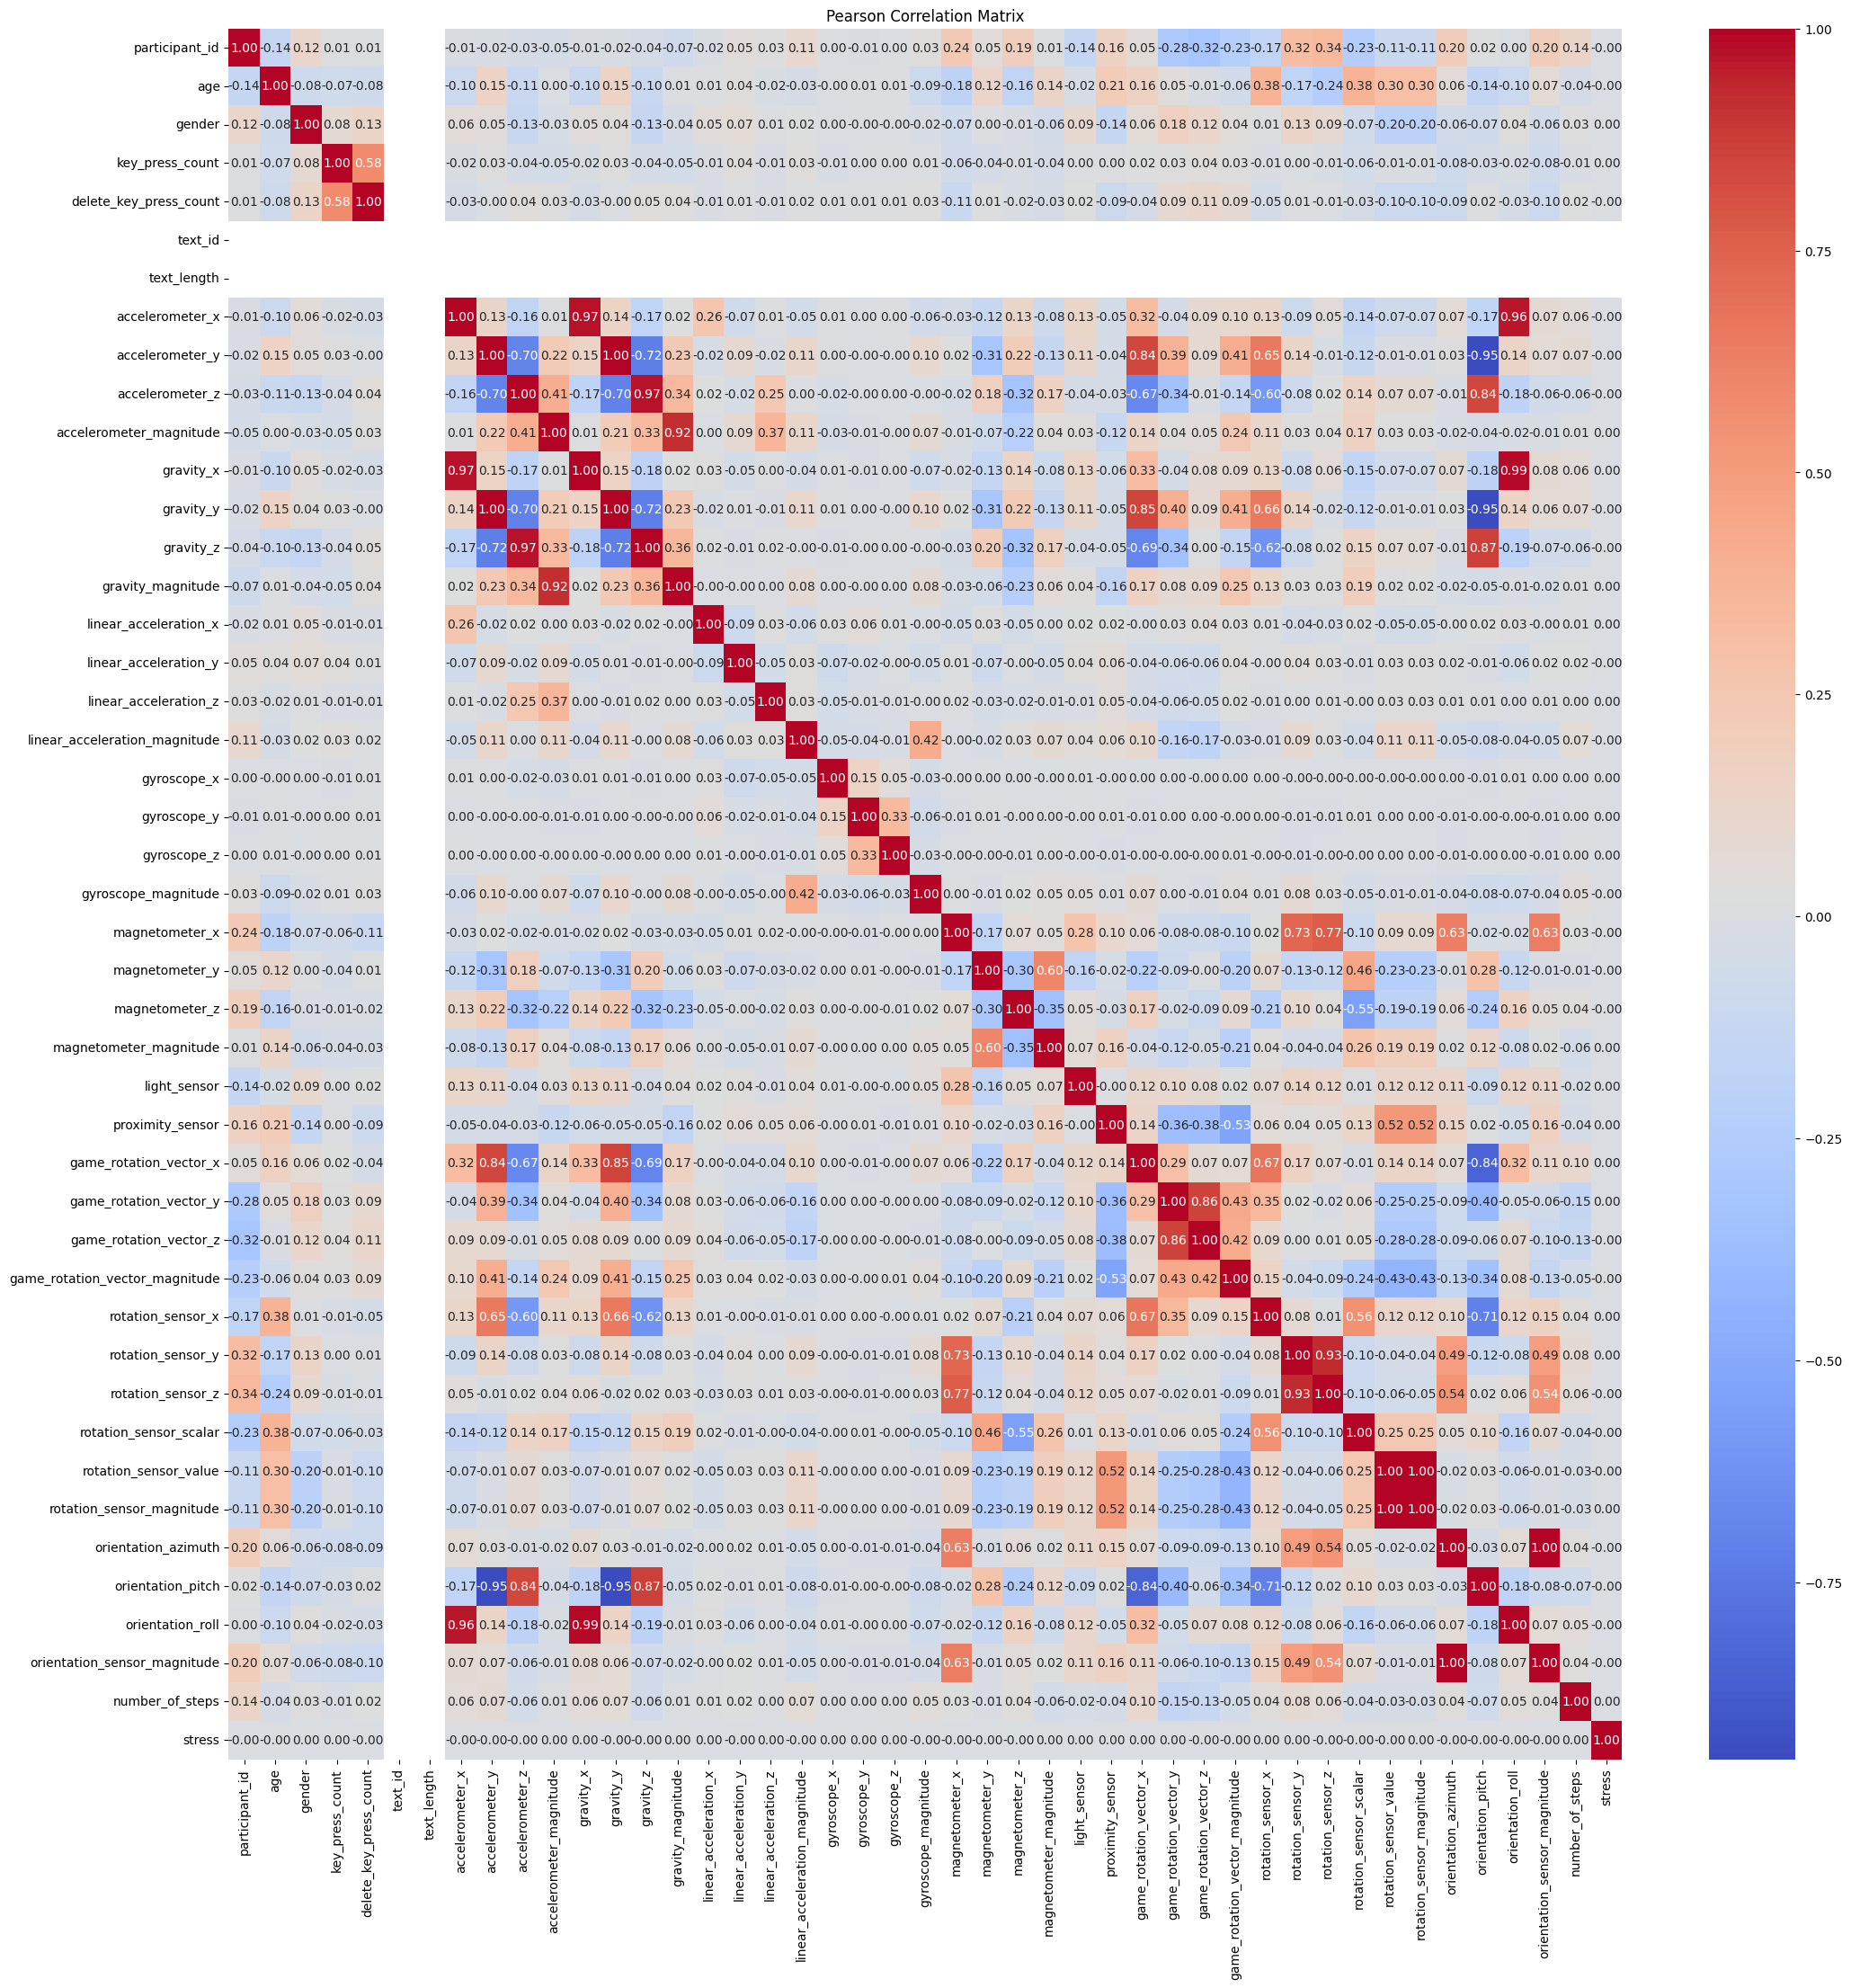

In [21]:
# pearse correlation matrix
correlation_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Pearson Correlation Matrix')

# Show plot
plt.show()

# EDA

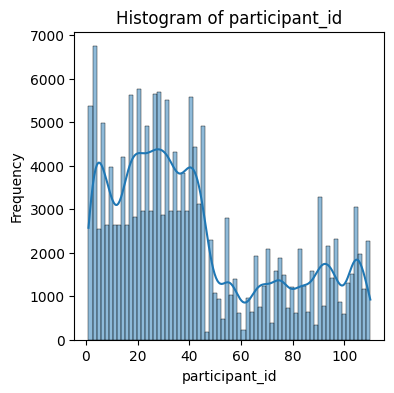

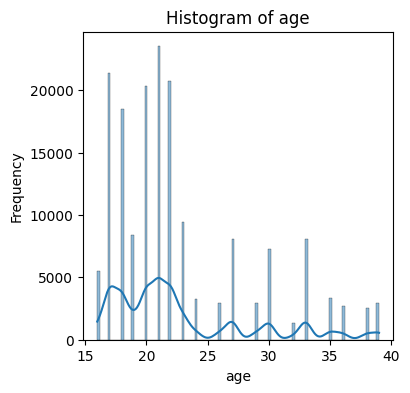

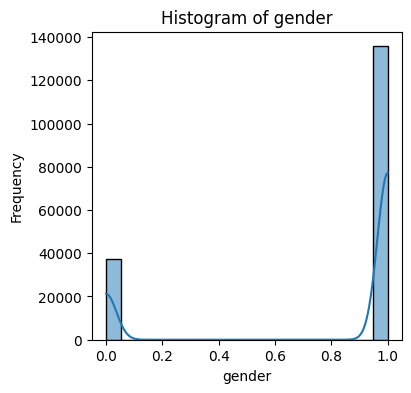

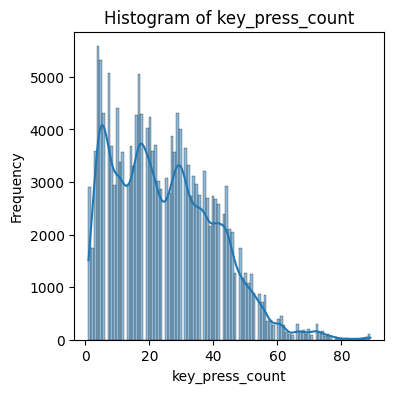

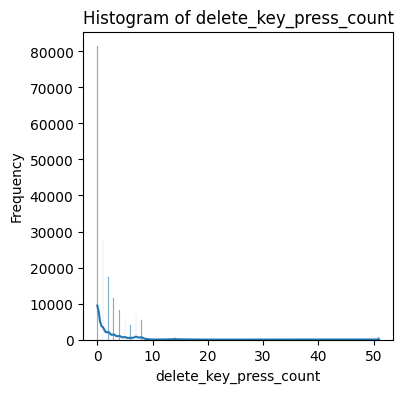

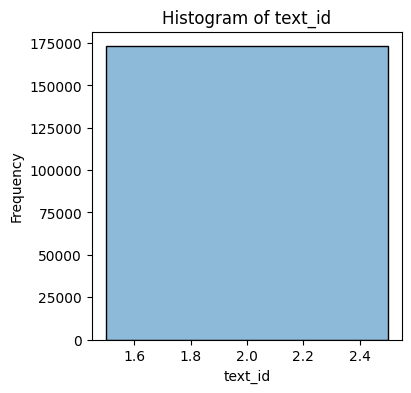

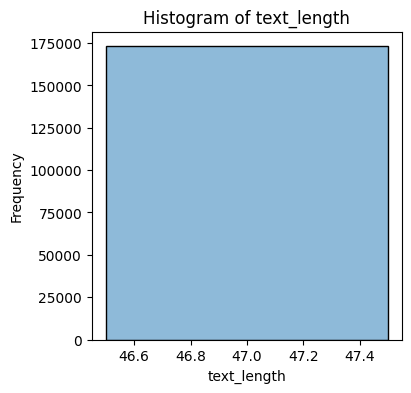

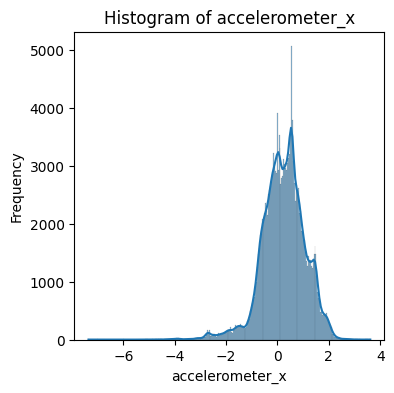

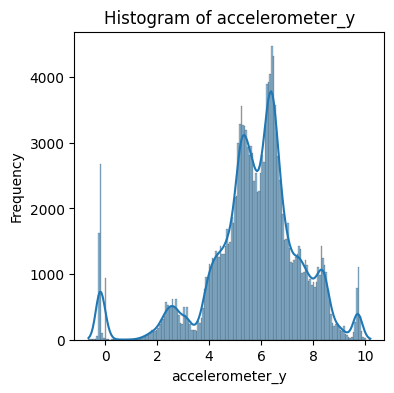

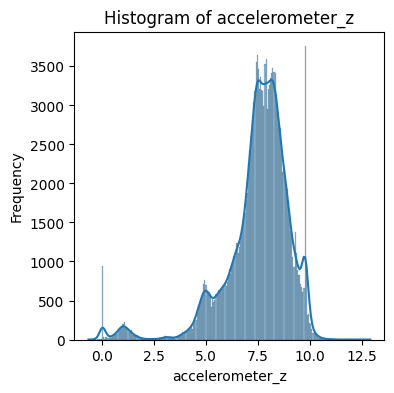

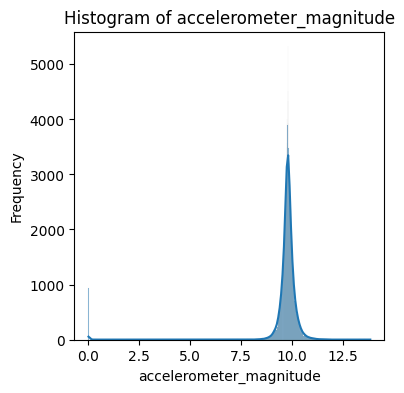

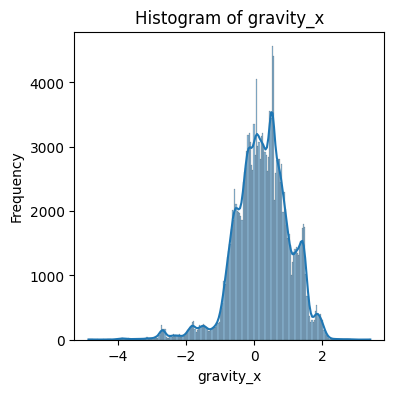

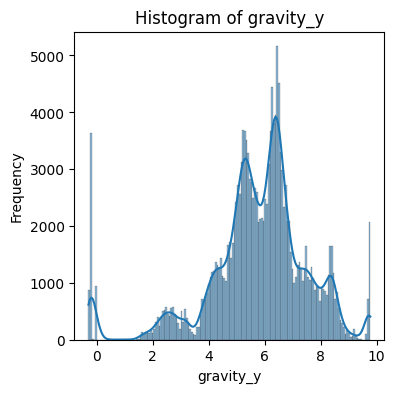

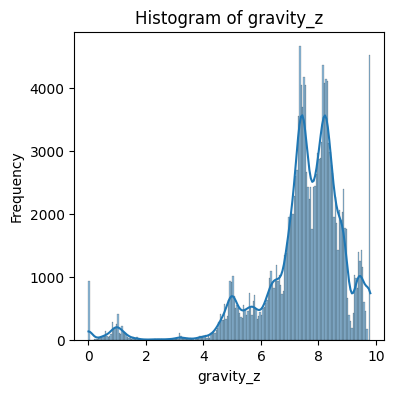

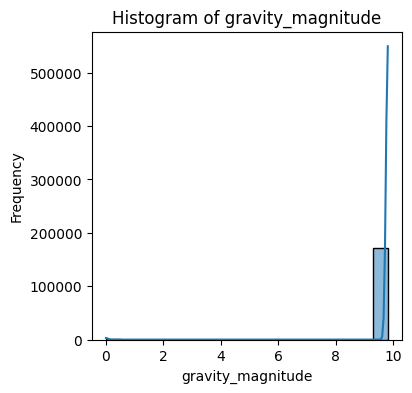

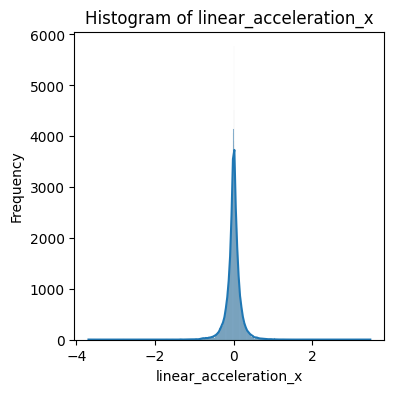

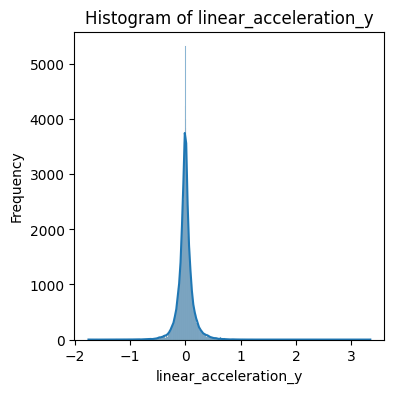

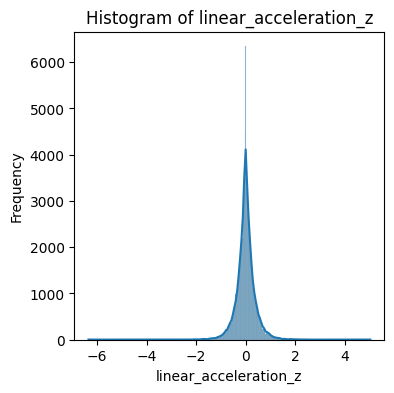

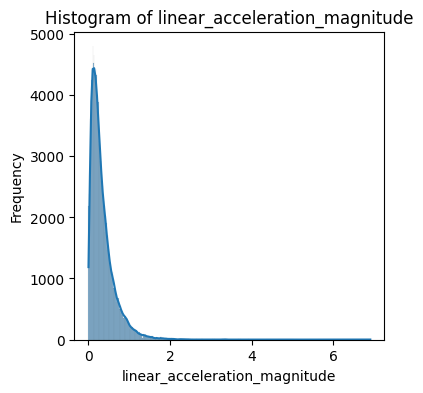

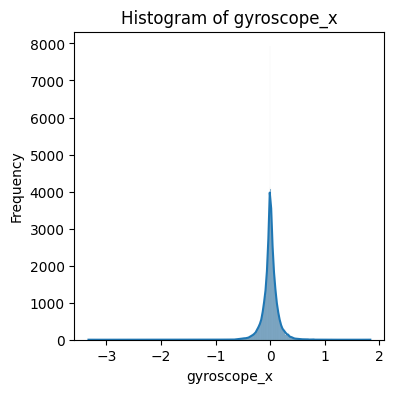

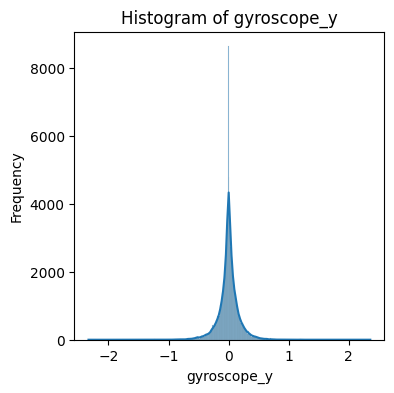

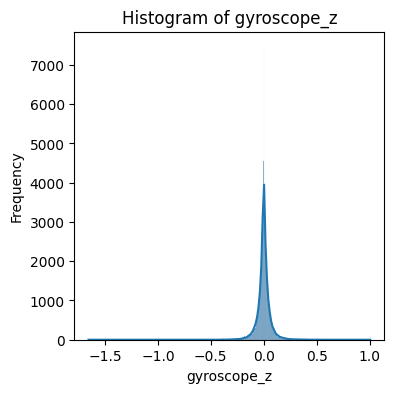

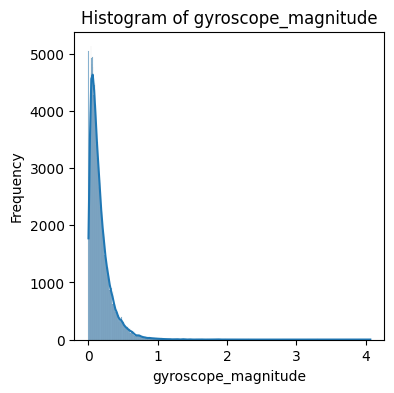

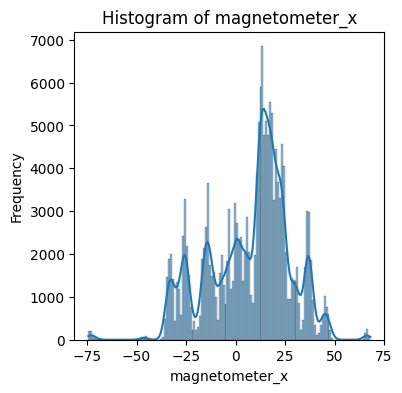

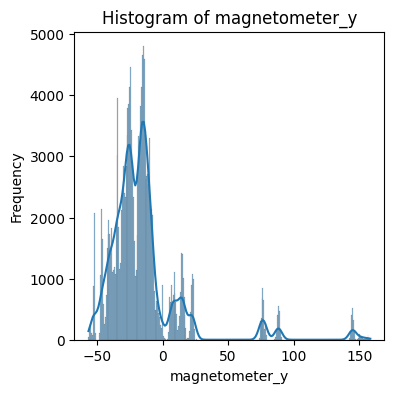

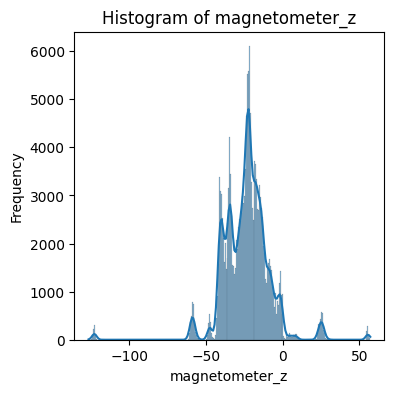

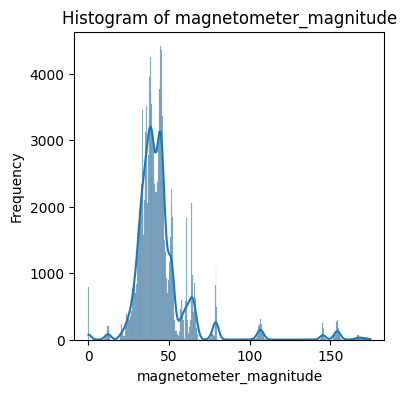

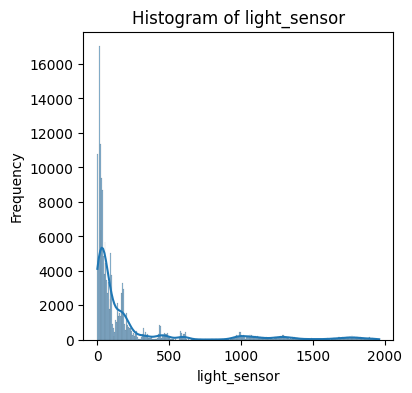

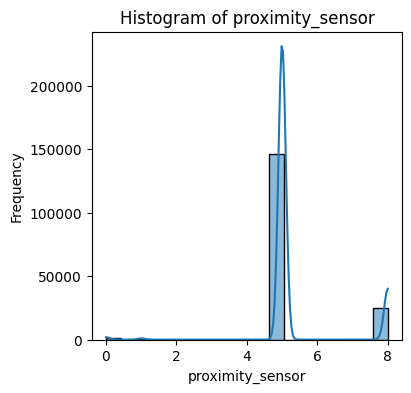

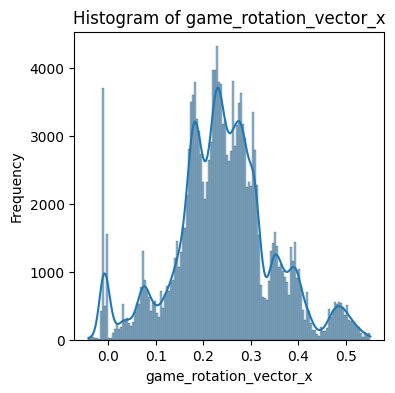

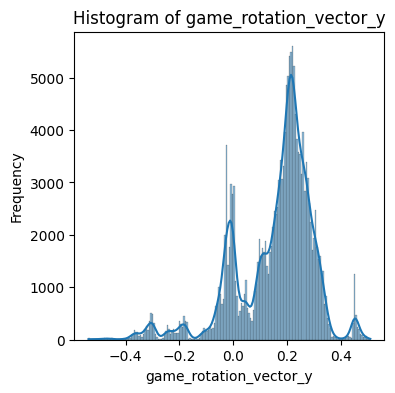

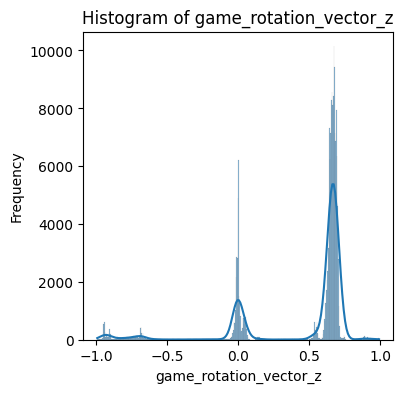

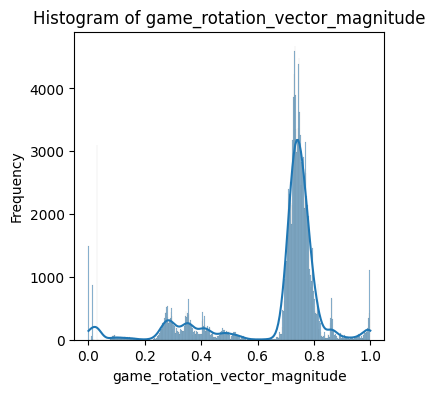

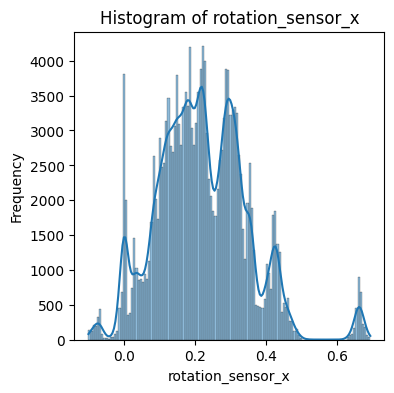

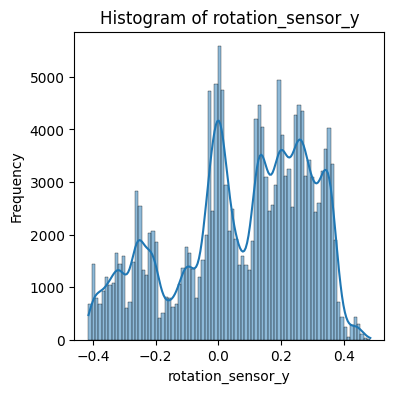

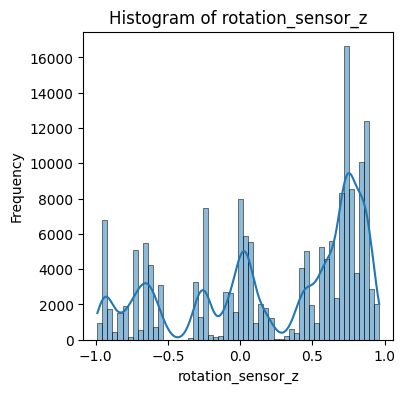

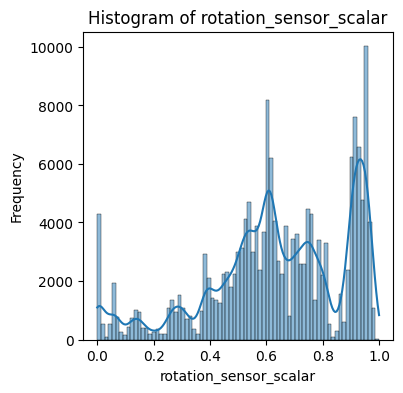

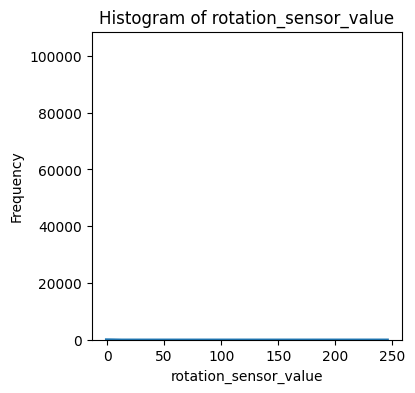

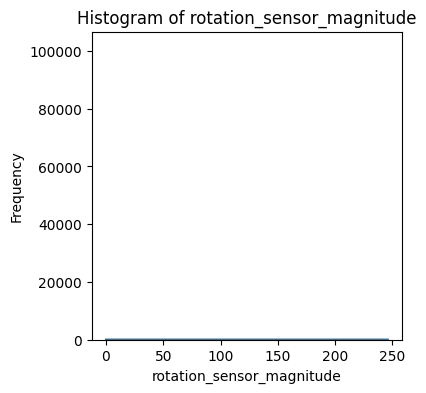

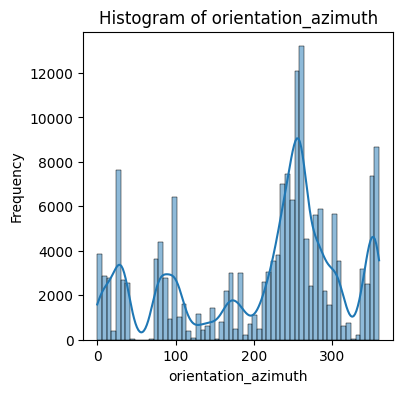

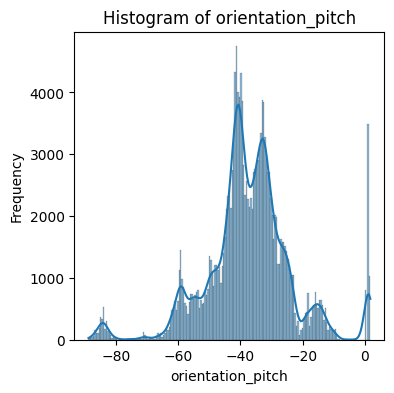

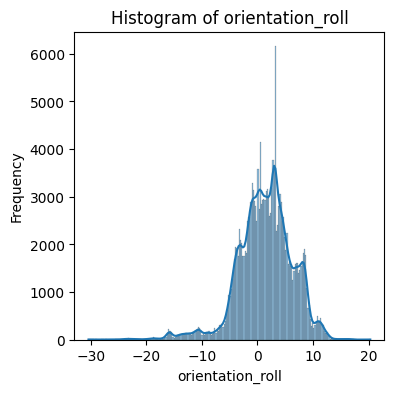

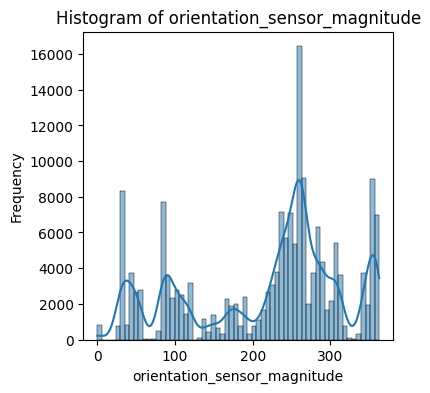

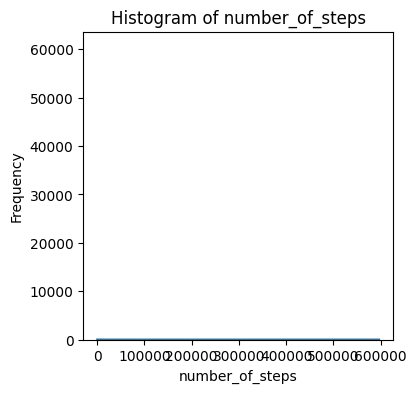

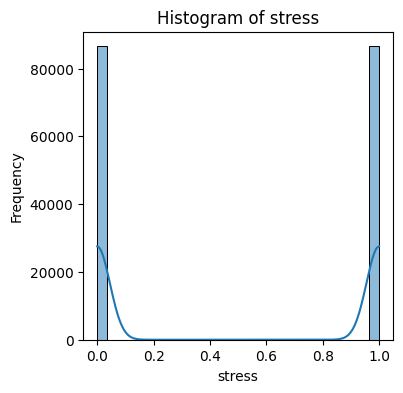

In [29]:
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
for col in combined_df.columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(combined_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

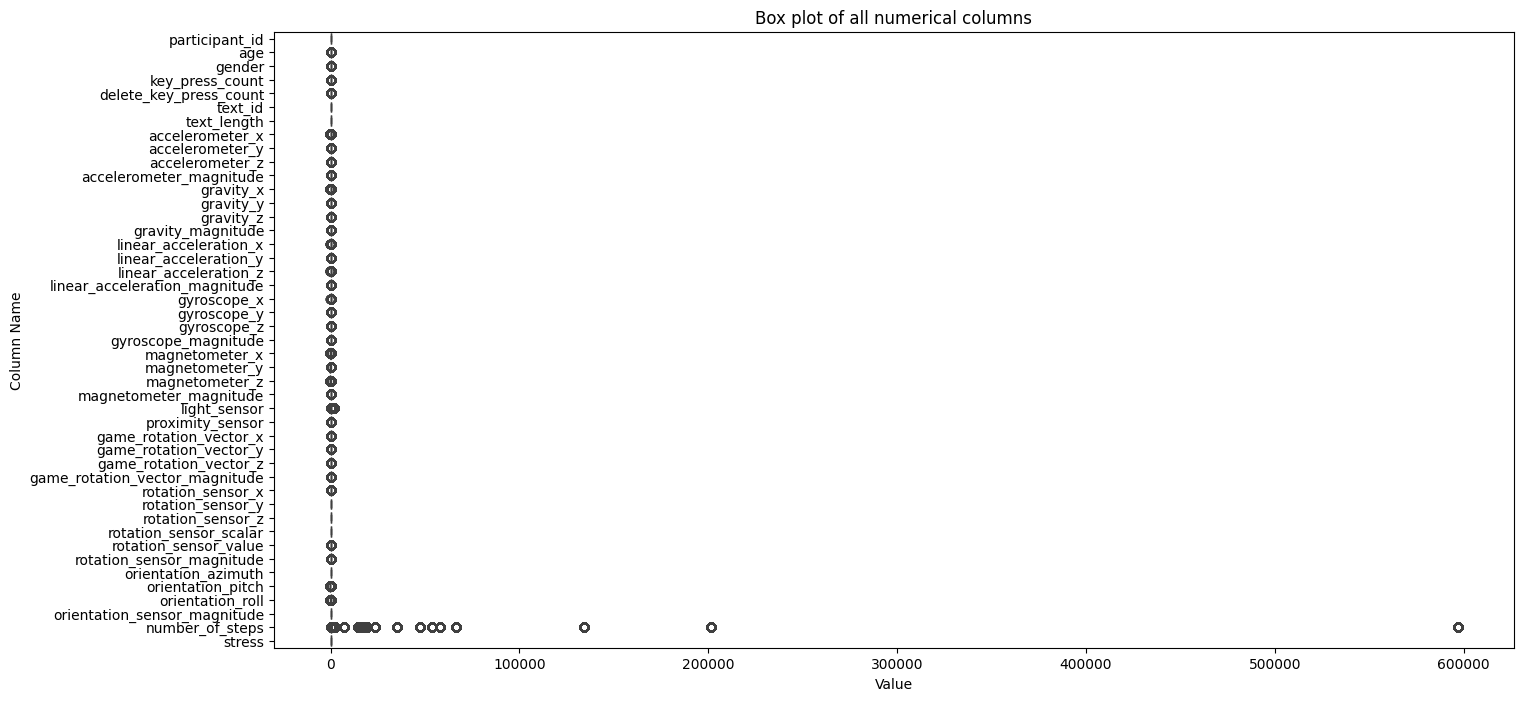

In [25]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_df, orient='h')
plt.title('Box plot of all numerical columns')
plt.xlabel('Value')
plt.ylabel('Column Name')
plt.show()

In [30]:

print(len(combined_df.columns))
print(len(combined_df.select_dtypes(include=['float64', 'int64']).columns))

45
45


In [63]:
# removing outliers

# Define a function to remove outliers using Z-score
def remove_outliers_iqr(df, whisker_width=1.5):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - whisker_width * IQR
    upper_bound = Q3 + whisker_width * IQR

    # Remove rows where any feature falls outside the bounds
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_cleaned

# Remove outliers from the DataFrame 'combined_df' except for the 'stress' column
combined_df_cleaned = remove_outliers_iqr(combined_df.drop(columns=['stress']))

# Add back the 'stress' column to the cleaned DataFrame if needed
if 'stress' in combined_df.columns:
    combined_df_cleaned['stress'] = combined_df['stress']


In [64]:
print(combined_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31006 entries, 53 to 165488
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   participant_id                  31006 non-null  int64  
 1   age                             31006 non-null  int64  
 2   gender                          31006 non-null  int64  
 3   key_press_count                 31006 non-null  int64  
 4   delete_key_press_count          31006 non-null  int64  
 5   text_id                         31006 non-null  int64  
 6   text_length                     31006 non-null  int64  
 7   accelerometer_x                 31006 non-null  float64
 8   accelerometer_y                 31006 non-null  float64
 9   accelerometer_z                 31006 non-null  float64
 10  accelerometer_magnitude         31006 non-null  float64
 11  gravity_x                       31006 non-null  float64
 12  gravity_y                       310

In [65]:
# minmax scaling
scaler = MinMaxScaler()
# Scale the numerical columns
selected_cols = combined_df.columns[combined_df.columns != "stress"]
combined_df_scaled = combined_df.copy()  # Make a copy of the original DataFrame to preserve it
combined_df_scaled[selected_cols] = scaler.fit_transform(combined_df[selected_cols])

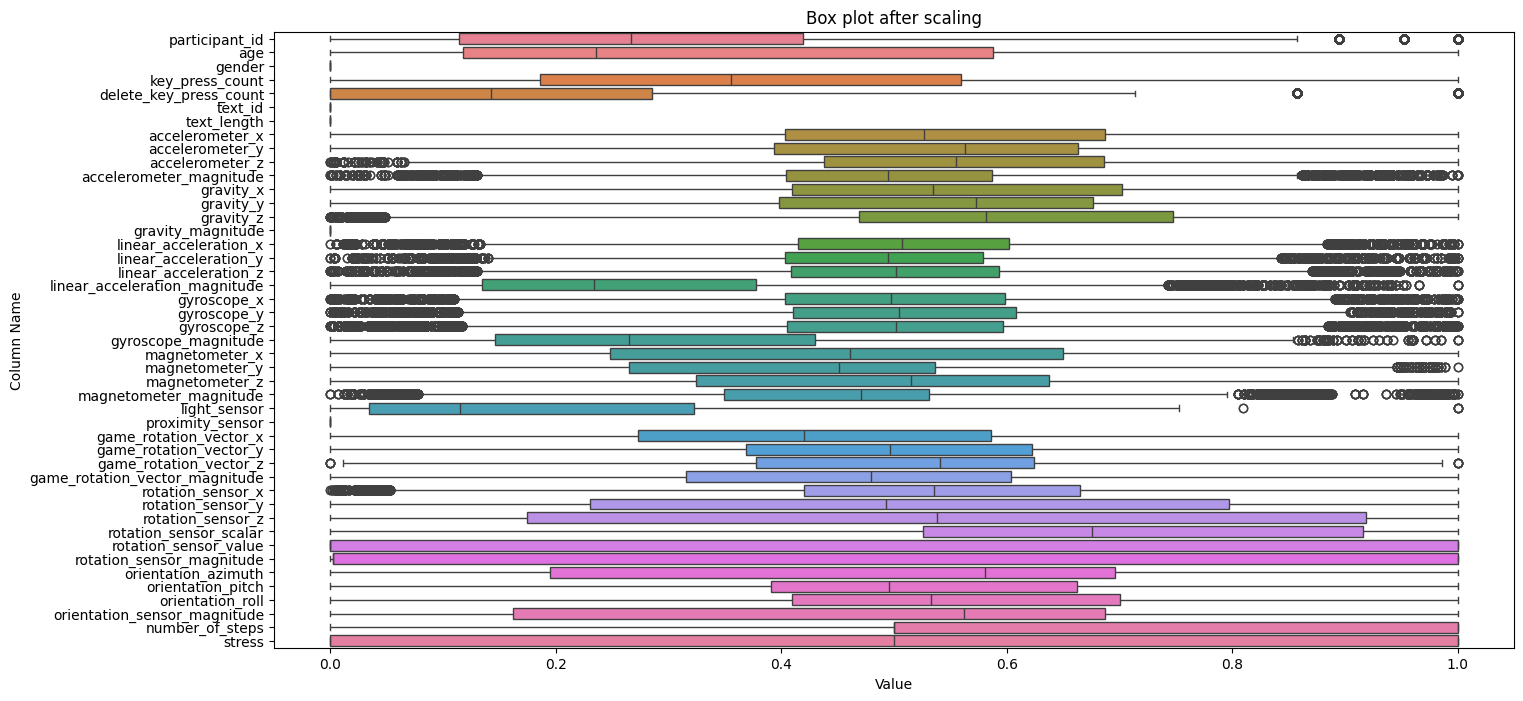

In [66]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_df_scaled, orient='h')
plt.title('Box plot after scaling')
plt.xlabel('Value')
plt.ylabel('Column Name')
plt.show()

# ML model

In [131]:
# spliting target class
X = combined_df_scaled.drop(['stress'], axis=1)  # Features
y = combined_df_scaled['stress']  # Target variable


In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

split_shape = {"TRAINING": [X_train.shape,y_train.shape],
               "VALIDATING": [X_val.shape, y_val.shape],
               "TESTING": [X_test.shape, y_test.shape]}

split_shape_df = pd.DataFrame(split_shape, index=["X shape", "y shape"])
display(split_shape_df)

,TRAINING,VALIDATING,TESTING
X shape,"(19843, 44)","(4961, 44)","(6202, 44)"
y shape,"(19843,)","(4961,)","(6202,)"


In [ ]:
# PCA

pca = PCA(n_components=0.8)  # Choose the number of components to explain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
#X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
#X_val_scaled = scaler.transform(X_val_pca)
X_test_scaled = scaler.transform(X_test_pca)

In [156]:
print(y_test.value_counts())
print(combined_df["stress"].value_counts())

stress
0    3101
1    3101
Name: count, dtype: int64
stress
0    86545
1    86545
Name: count, dtype: int64


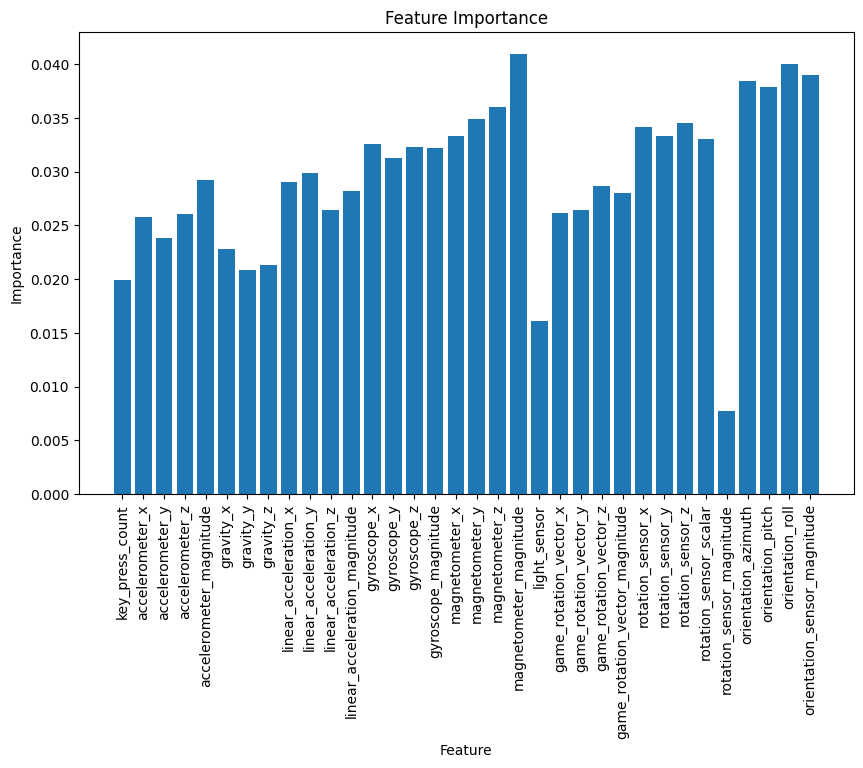

In [98]:
# feature selection

# Train a RandomForestClassifier
#clf = RandomForestClassifier()
#clf.fit(X_train, y_train)

# Plot feature importances
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
#plt.xticks(range(len(clf.feature_importances_)), X_train.columns, rotation=90)
#plt.xlabel('Feature')
#plt.ylabel('Importance')
#plt.title('Feature Importance')
#plt.show()

In [158]:
selector = SelectKBest(score_func=chi2, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['participant_id', 'age', 'key_press_count', 'delete_key_press_count',
       'accelerometer_x', 'accelerometer_z', 'accelerometer_magnitude',
       'gravity_x', 'linear_acceleration_x', 'linear_acceleration_z',
       'linear_acceleration_magnitude', 'gyroscope_x', 'gyroscope_y',
       'gyroscope_z', 'gyroscope_magnitude', 'magnetometer_x',
       'magnetometer_y', 'magnetometer_z', 'magnetometer_magnitude',
       'light_sensor', 'game_rotation_vector_x', 'game_rotation_vector_y',
       'game_rotation_vector_z', 'game_rotation_vector_magnitude',
       'rotation_sensor_x', 'rotation_sensor_scalar', 'rotation_sensor_value',
       'rotation_sensor_magnitude', 'orientation_roll', 'number_of_steps'],
      dtype='object')


In [159]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]

## FNN

In [170]:
from keras.utils import to_categorical

# One-hot encode the target labels
#y_train_categorical = to_categorical(y_train)
#y_test_categorical = to_categorical(y_test)
#y_val_categorical = to_categorical(y_val)

model = Sequential()
model.add(Dense(units=256, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=32, activation='tanh'))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(units=8, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model with different batch sizes
batch_sizes = [32, 64, 128]  # Example batch sizes to try
histories = []

for batch_size in batch_sizes:
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_data=(X_val, y_val))
    histories.append(history)

# Plot training and validation accuracy for each batch size
plt.figure(figsize=(10, 5))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Batch Size {batch_sizes[i]}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Batch Size {batch_sizes[i]}')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [171]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
621/621 [==============================] - 2s 2ms/step - loss: 0.6970 - accuracy: 0.4984 - val_loss: 0.6970 - val_accuracy: 0.4999
Epoch 2/200
621/621 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5019 - val_loss: 0.6934 - val_accuracy: 0.4999
Epoch 3/200
621/621 [==============================] - 2s 3ms/step - loss: 0.6952 - accuracy: 0.4956 - val_loss: 0.6946 - val_accuracy: 0.5001
Epoch 4/200
621/621 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4996 - val_loss: 0.6945 - val_accuracy: 0.5001
Epoch 5/200
621/621 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5013 - val_loss: 0.6962 - val_accuracy: 0.5001
Epoch 6/200
621/621 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4989 - val_loss: 0.6939 - val_accuracy: 0.5001
Epoch 7/200
621/621 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5030 - val_loss: 0.6953 - val_accuracy: 0.5001

194/194 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5000
Test Loss: 0.6966890096664429, Test Accuracy: 0.5


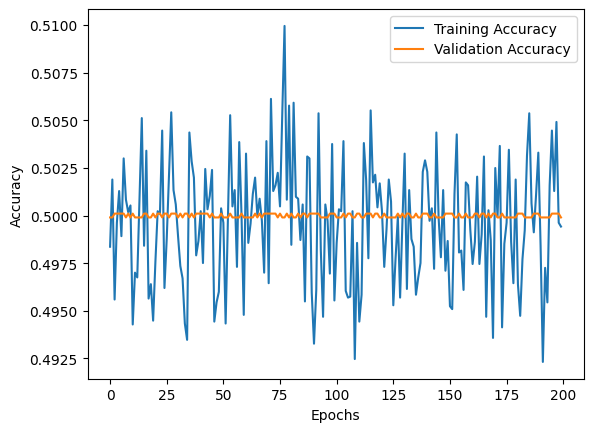

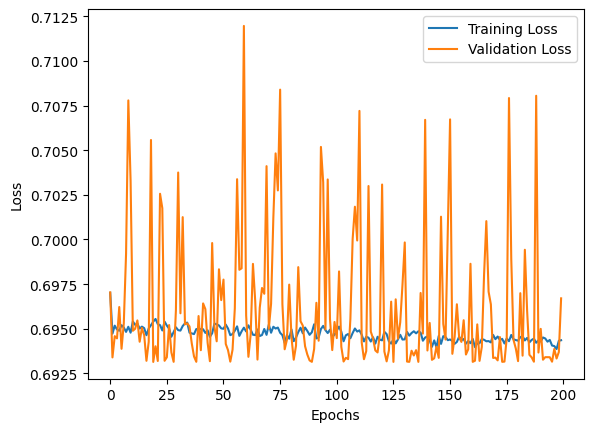

In [172]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

194/194 [==============================] - 0s 1ms/step

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3101
           1       0.50      1.00      0.67      3101

    accuracy                           0.50      6202
   macro avg       0.25      0.50      0.33      6202
weighted avg       0.25      0.50      0.33      6202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


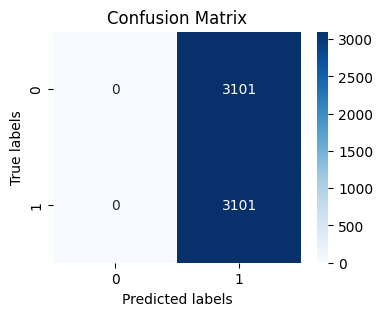

In [173]:
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int)

print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(cm))+0.5, labels=np.arange(len(cm)))
plt.yticks(ticks=np.arange(len(cm))+0.5, labels=np.arange(len(cm)))
plt.show()

In [110]:
# investigating misclassification
# Step 1: Get Model Predictions
predictions = model.predict(X_test)

# Step 2: Compare Predictions with Ground Truth
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels and flatten to 1D array
correct_labels = y_test.values.flatten()  # Convert Pandas Series to NumPy array and flatten to 1D array

# Step 3: Extract Misclassified Instances
misclassified_indices = np.where(predicted_labels != correct_labels)[0]
misclassified_instances = X_test.iloc[misclassified_indices]  # Assuming X_test is a DataFrame

# Step 4: Analyze Misclassified Instances
print("Number of misclassified instances:", len(misclassified_instances))
print("Misclassified instances:")
display(misclassified_instances)

# Step 5: Identify Potential Issues
# Perform further analysis to identify patterns or common characteristics in misclassified instances

# Step 6: Refine Preprocessing or Feature Engineering
# Based on your analysis, make adjustments to preprocessing or feature engineering steps

# Step 7: Iterate and Experiment
# Make adjustments to your preprocessing pipeline or feature engineering based on your analysis
# Re-train your model with the refined dataset and evaluate its performance

194/194 [==============================] - 0s 1ms/step
Number of misclassified instances: 3161
Misclassified instances:


,key_press_count,accelerometer_x,accelerometer_y,accelerometer_z,accelerometer_magnitude,gravity_x,gravity_y,gravity_z,linear_acceleration_x,linear_acceleration_y,...,game_rotation_vector_magnitude,rotation_sensor_x,rotation_sensor_y,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude
11450,0.288136,0.577324,0.740807,0.382716,0.485241,0.598618,0.769272,0.366002,0.451206,0.354326,...,0.553480,0.442786,0.952016,0.961433,0.318962,0.002504,0.591115,0.294974,0.594790,0.575665
7372,0.813559,0.668380,0.127847,0.870101,0.616328,0.701393,0.146880,0.911668,0.412361,0.307361,...,0.280491,0.434544,0.698293,0.948845,0.527414,0.002507,0.658679,0.877168,0.699465,0.634936
52065,0.593220,0.467766,0.805167,0.325563,0.521844,0.491459,0.818967,0.304163,0.388981,0.527017,...,0.616247,0.883129,0.516665,0.538172,0.968463,0.002507,0.988504,0.240943,0.490512,0.988628
63060,0.440678,0.771486,0.592182,0.471977,0.363573,0.818231,0.625844,0.507875,0.365324,0.262746,...,0.596147,0.305255,0.935991,0.996329,0.009582,0.002504,0.485765,0.434245,0.816406,0.464351
3953,0.593220,0.518386,0.332233,0.754314,0.569722,0.503051,0.341955,0.795969,0.668172,0.456501,...,0.046322,0.494624,0.736971,0.883902,0.685142,0.999993,0.723738,0.714366,0.502029,0.704978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68934,0.372881,0.640300,0.585304,0.533818,0.489790,0.663813,0.598232,0.559736,0.463214,0.483265,...,0.431159,0.314600,0.915555,0.995884,0.119340,0.002507,0.519161,0.471689,0.661977,0.497314
6504,0.355932,0.631321,0.141405,0.849480,0.549421,0.643685,0.131813,0.925556,0.533051,0.617381,...,0.332263,0.420016,0.701363,0.949712,0.526369,0.002507,0.657409,0.885066,0.658351,0.633445
12502,0.813559,0.418555,0.520908,0.678130,0.767022,0.430998,0.550368,0.618927,0.442450,0.290558,...,0.400395,0.353065,0.884444,0.974230,0.336835,0.002507,0.589164,0.523110,0.430448,0.568267
42797,0.101695,0.240017,0.866875,0.170103,0.353763,0.220379,0.901274,0.164412,0.578737,0.321187,...,0.529099,0.554706,0.921501,0.900775,0.551624,0.003873,0.679535,0.260670,0.403889,0.667534


<ipython-input-115-b910bf47ab96>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='key_press_count', y='accelerometer_x', data=misclassified_instances, palette='Set1', legend='full')


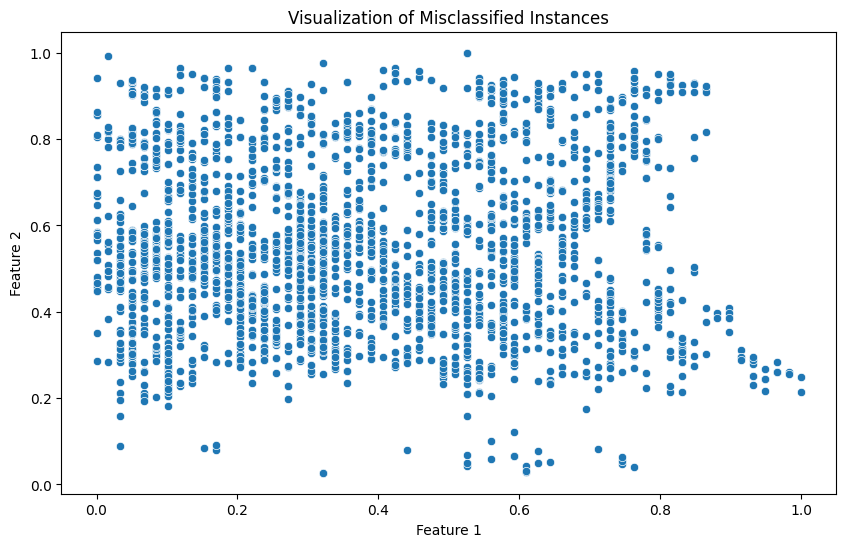

In [115]:
# Step 5: Identify Potential Issues
# Visualize misclassified instances
plt.figure(figsize=(10, 6))
sns.scatterplot(x='key_press_count', y='accelerometer_x', data=misclassified_instances, palette='Set1', legend='full')
plt.title('Visualization of Misclassified Instances')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## LGBM

In [ ]:
lgbm = LGBMClassifier(n_estimators=500, random_state=42)

lgbm.fit(X_train_scaled, y_train)


[LightGBM] [Info] Number of positive: 62312, number of negative: 62312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 124624, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=500, random_state=42)

In [ ]:
# Make predictions
y_test_pred = lgbm.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4711132936622566
